In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf                                         
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import tensorflow_datasets as tfds

In [4]:
ds = tfds.load('fashion_mnist',split = 'train')

In [5]:
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [6]:
dataiterator = ds.as_numpy_iterator()

In [7]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

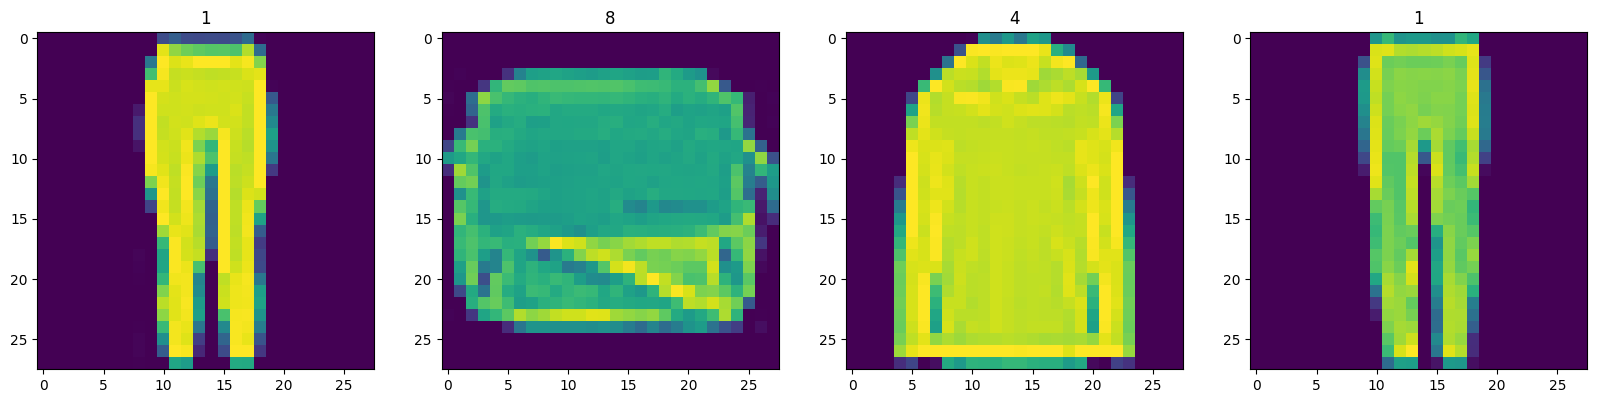

In [8]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx in range(4):
    batch = dataiterator.next()
    ax[idx].imshow(np.squeeze(batch['image']))
    ax[idx].title.set_text(batch['label'])

In [9]:
def scale_images (data): 
    image = data['image']
    return image/255

In [10]:
ds = tfds.load('fashion_mnist', split = 'train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)


In [11]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [17]:
def build_gen():
    model = Sequential()
    model.add(Dense(7*7*128, input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))


    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding = 'same'))
    model.add(LeakyReLU(0.2))


    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1,4,padding = 'same', activation = 'sigmoid'))
    


    return model




    return model

In [18]:
test_model = build_gen()

In [19]:
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [20]:
generator = build_gen()

In [21]:
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [22]:
img = generator.predict(np.random.randn(4,128,1
                                        ))

1/1 [==============================] - 0s 494ms/step


In [23]:
img

array([[[[0.49589616],
         [0.49540523],
         [0.49529916],
         ...,
         [0.49810857],
         [0.49912313],
         [0.503331  ]],

        [[0.49308318],
         [0.49735287],
         [0.50456053],
         ...,
         [0.49348152],
         [0.49670237],
         [0.49964124]],

        [[0.49375063],
         [0.48812574],
         [0.49145782],
         ...,
         [0.49420252],
         [0.49607325],
         [0.50112206]],

        ...,

        [[0.49467364],
         [0.49243012],
         [0.49749658],
         ...,
         [0.49352998],
         [0.49757326],
         [0.4996887 ]],

        [[0.49812785],
         [0.4977135 ],
         [0.49563774],
         ...,
         [0.49402452],
         [0.49659738],
         [0.4986039 ]],

        [[0.4962216 ],
         [0.49842688],
         [0.4953404 ],
         ...,
         [0.49466714],
         [0.49957588],
         [0.5002529 ]]],


       [[[0.48969844],
         [0.49342805],
         [0.50

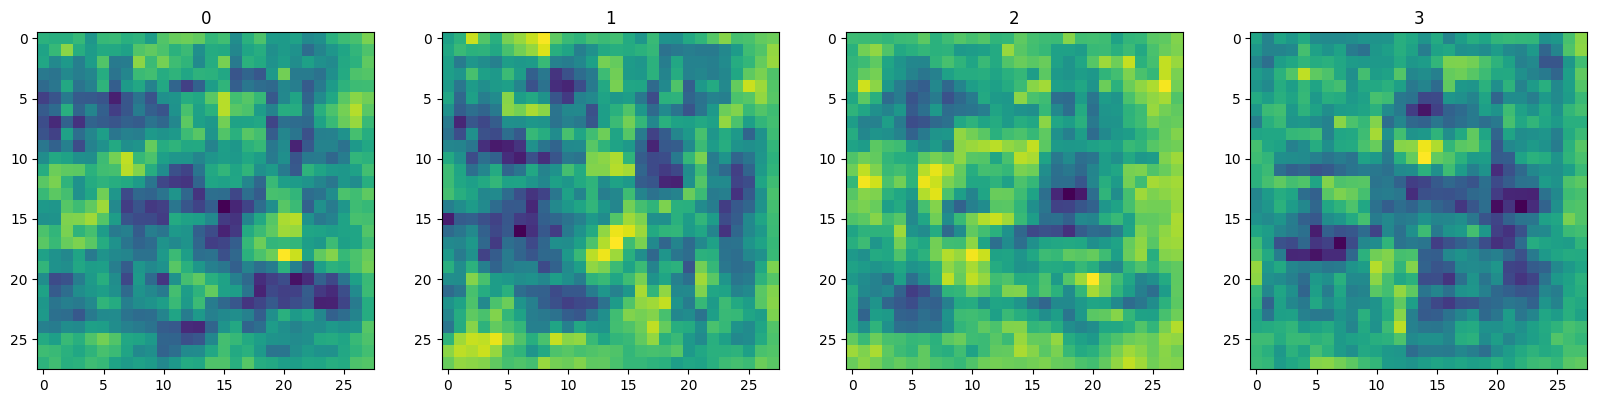

In [24]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(img):

    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [25]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)